In [1]:
import pandas as pd
import xarray as xr
import os
import glob
import matplotlib.pyplot as plt

_dir = os.getcwd()
print(_dir)
_loc_files = glob.glob(_dir + '/CRE_data/*.nc')
print(_loc_files)

print('done')

/home/jupyter/cae-notebooks
['/home/jupyter/cae-notebooks/CRE_data/Minimum air temperature at 2m_GWL1.0_50th.nc', '/home/jupyter/cae-notebooks/CRE_data/Maximum air temperature at 2m_GWL1.5_50th.nc', '/home/jupyter/cae-notebooks/CRE_data/Precipitation (total)_GWL1.0_50th.nc', '/home/jupyter/cae-notebooks/CRE_data/Precipitation (total)_GWL2.0_90th.nc', '/home/jupyter/cae-notebooks/CRE_data/Precipitation (total)_GWL1.5_50th.nc', '/home/jupyter/cae-notebooks/CRE_data/Minimum air temperature at 2m_GWL2.0_50th.nc', '/home/jupyter/cae-notebooks/CRE_data/Minimum air temperature at 2m_GWL2.0_90th.nc', '/home/jupyter/cae-notebooks/CRE_data/Maximum air temperature at 2m_GWL2.0_50th.nc', '/home/jupyter/cae-notebooks/CRE_data/Minimum air temperature at 2m_GWL1.5_50th.nc', '/home/jupyter/cae-notebooks/CRE_data/Maximum air temperature at 2m_GWL2.0_90th.nc', '/home/jupyter/cae-notebooks/CRE_data/Minimum air temperature at 2m_GWL1.5_90th.nc', '/home/jupyter/cae-notebooks/CRE_data/Precipitation (total)_

In [2]:
# Initialize dictionaries to store data arrays
precipitation_data = []
min_temp_data = []
max_temp_data = []

# Process each file based on the variable name
for file_path in _loc_files:
    ds = xr.open_dataset(file_path)
    variable_name = list(ds.data_vars.keys())[0]
        
    if 'xarray_dataarray_variable' in variable_name:
        # Calculate the average over the month dimension for precipitation
        avg_precipitation = ds.mean(dim='month',skipna=True)
        variable_name2 = f'Avg. Daily Precip(in)GWL{ds['warming_level'].values}_{ds['quantile'].values*100}%'
        avg_precipitation = avg_precipitation.rename({variable_name: variable_name2})
        avg_precipitation=avg_precipitation.drop_vars(['quantile', 'warming_level'])
        precipitation_data.append(avg_precipitation)
        
    elif 'Minimum air temperature' in variable_name:
        # Calculate the minimum over the month dimension for minimum air temperature
        min_temp = ds.min(dim='month',skipna=True)
        variable_name2 =  f'Min air temp(DegF)GWL{ds['warming_level'].values}_{ds['quantile'].values*100}%'
        min_temp = min_temp.rename({variable_name: variable_name2})
        min_temp=min_temp.drop_vars(['quantile', 'warming_level'])
        min_temp_data.append(min_temp)
        
    elif 'Maximum air temperature' in variable_name:
        # Calculate the maximum over the month dimension for maximum air temperature
        max_temp = ds.max(dim='month',skipna=True)
        variable_name2 = f'Max air temp(DegF)GWL{ds['warming_level'].values}_{ds['quantile'].values*100}%'
        max_temp = max_temp.rename({variable_name: variable_name2})
        max_temp=max_temp.drop_vars(['quantile', 'warming_level'])
        max_temp_data.append(max_temp)
        

precipitation_data = xr.merge(precipitation_data)
precipitation_data_df = precipitation_data.to_dataframe().reset_index()
precipitation_data_df.dropna(inplace=True)

min_temp_data = xr.merge(min_temp_data)
min_temp_data_df = min_temp_data.to_dataframe().reset_index()
min_temp_data_df.dropna(inplace=True)

max_temp_data = xr.merge(max_temp_data)
max_temp_data_df = max_temp_data.to_dataframe().reset_index()
max_temp_data_df.dropna(inplace=True)



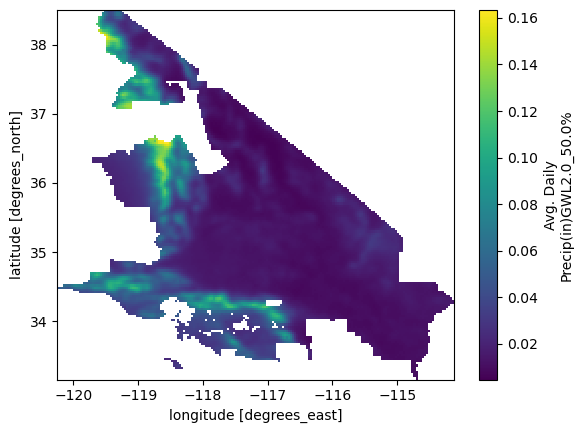

In [3]:

precipitation_data['Avg. Daily Precip(in)GWL2.0_50.0%'].plot()

In [4]:
# Read the CSV file with subset of locations
locations_df = pd.read_csv('~/cae-notebooks/2026_CRE_Asset_Locs_modelLocs.csv')
vars_to_drop = ['lat','lon','lat_difference','lon_difference']
# Subset the data based on 'model lat' and 'model lon'
subset_precipitation_df = precipitation_data_df.merge(locations_df, left_on=['lat', 'lon'], right_on=['model lat', 'model lon'])
subset_precipitation_df = subset_precipitation_df.drop(columns = vars_to_drop)
subset_min_temp_df = min_temp_data_df.merge(locations_df, left_on=['lat', 'lon'], right_on=['model lat', 'model lon'])
subset_min_temp_df = subset_min_temp_df.drop(columns = vars_to_drop)
subset_max_temp_df = max_temp_data_df.merge(locations_df, left_on=['lat', 'lon'], right_on=['model lat', 'model lon'])
subset_max_temp_df = subset_max_temp_df.drop(columns = vars_to_drop)
subset_precipitation_df.to_csv('2026CAVA_CREAssets_Precip.csv')
subset_min_temp_df.to_csv('2026CAVA_CREAssets_MinTemp.csv')
subset_max_temp_df.to_csv('2026CAVA_CREAssets_MaxTemp.csv')

In [6]:

subset_max_temp_df

,Max air temp(DegF)GWL1.5_50.0%,Max air temp(DegF)GWL2.0_50.0%,Max air temp(DegF)GWL2.0_90.0%,Max air temp(DegF)GWL1.0_50.0%,Max air temp(DegF)GWL1.5_90.0%,Name,Asset Type,CRE Lat,CRE Lon,gridcode,model lat,model lon
0,81.845528,83.272682,84.976395,80.562241,83.576942,Catalina Service Center,Service Center,33.334240,-118.310032,191811,33.328125,-118.328125
1,95.413910,96.509750,98.473938,94.099464,97.149918,Wildomar Service Center,Service Center,33.587421,-117.233250,187750,33.578125,-117.234375
2,111.305519,112.280205,113.559776,109.794334,112.322464,Blythe Service Center,Service Center,33.603299,-114.598031,187322,33.609375,-114.609375
3,89.288589,90.348534,92.092896,88.144234,90.788292,Irvine Operations Center (IOC) ...,Non-Electric Facility,33.655597,-117.704459,186711,33.640625,-117.703125
4,89.288589,90.348534,92.092896,88.144234,90.788292,Saddleback Service Center,Service Center,33.654579,-117.703584,186711,33.640625,-117.703125
...,...,...,...,...,...,...,...,...,...,...,...,...
94,79.416336,80.482307,82.472595,77.559372,81.229881,Northern Hydro Office/Big Creek,Generation,37.204091,-119.245217,128294,37.203125,-119.234375
95,97.980782,99.046257,100.749306,96.617851,99.335403,Bishop Service Center (new),Service Center,37.361063,-118.454116,125759,37.359375,-118.453125
96,99.787254,100.885674,102.509872,98.308693,101.153046,Bishop Service Center (original),Non-Electric Facility,37.359813,-118.397512,125761,37.359375,-118.390625
97,78.171738,79.488556,81.356056,76.835007,80.020233,Mammoth Lakes Service Center,Service Center,37.637865,-118.963944,121135,37.640625,-118.953125
